In [2]:
%pip install neurokit2

You should consider upgrading via the '/Users/lucavalsecchi/Work/pyheart/myenv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


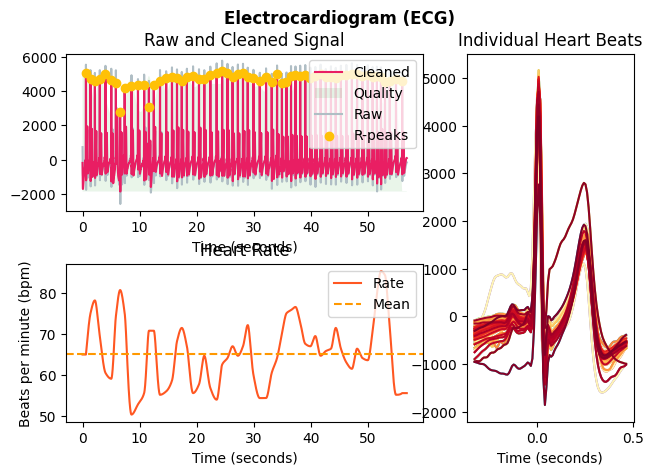

In [3]:
import json
import neurokit2 as nk
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

with open('./fake.json', 'r') as json_file:
    data = json.load(json_file)

data_key = data['data']    

array_flatten = []

for obj in data_key:
    misurazioni = obj["ecg"]["Samples"]
    array_flatten.extend(misurazioni)
    
signals, info = nk.ecg_process(array_flatten[:100000], sampling_rate=125)
# nk.ecg_plot(signals, sampling_rate=125)
bpms = signals["ECG_Rate"]

rrIntervals = (60 * 1000) / bpms

chunk = 100000
subarrays = [array_flatten[i:i+chunk] for i in range(0, len(array_flatten), chunk)]
for subarray in subarrays:
    signals, info = nk.ecg_process(subarray, sampling_rate=125)
    nk.ecg_plot(signals, sampling_rate=125)